In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-bangalore-restaurants/zomato.csv


In [2]:
import pandas as pd

df = pd.read_csv('/kaggle/input/zomato-bangalore-restaurants/zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df = df.dropna(subset=['rate'])

In [6]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [7]:
df['rate'] = df['rate'].str.replace('/5', '').replace('NEW', float('nan')).replace('-', float('nan')).astype(float)

In [8]:
df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [9]:
df = df.dropna(subset=['rate'])

In [10]:
df['is_good'] = df['rate'].apply(lambda x: 1 if x > 3.75 else 0)

In [11]:
df = df.drop('rate', axis=1)

In [12]:
df

,url,address,name,online_order,book_table,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),is_good
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,1
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,0
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51709,https://www.zomato.com/bangalore/the-farm-hous...,"136, SAP Labs India, KIADB Export Promotion In...",The Farm House Bar n Grill,No,No,34,+91 9980121279\n+91 9900240646,Whitefield,"Casual Dining, Bar",NaN,"North Indian, Continental",800,"[('Rated 4.0', 'RATED\n Ambience- Big and spa...",[],Pubs and bars,Whitefield,0
51711,https://www.zomato.com/bangalore/bhagini-2-whi...,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,No,No,81,080 65951222,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars,Whitefield,0
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield,0
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield,1


In [13]:
df['dish_liked'].fillna(df['dish_liked'].mode()[0], inplace=True)

/tmp/ipykernel_609/3962288892.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['dish_liked'].fillna(df['dish_liked'].mode()[0], inplace=True)


In [14]:
df = df.dropna(subset=['rest_type', 'cuisines', 'approx_cost(for two people)'])

In [15]:
df.isna().sum()

url                              0
address                          0
name                             0
online_order                     0
book_table                       0
votes                            0
phone                          576
location                         0
rest_type                        0
dish_liked                       0
cuisines                         0
approx_cost(for two people)      0
reviews_list                     0
menu_item                        0
listed_in(type)                  0
listed_in(city)                  0
is_good                          0
dtype: int64

In [16]:
# Remove the commas from the approx_cost column
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace(',', '')

# Convert the approx_cost column to a numerical type
df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'])


/tmp/ipykernel_609/3214176263.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace(',', '')
/tmp/ipykernel_609/3214176263.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'])


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41263 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          41263 non-null  object
 1   address                      41263 non-null  object
 2   name                         41263 non-null  object
 3   online_order                 41263 non-null  object
 4   book_table                   41263 non-null  object
 5   votes                        41263 non-null  int64 
 6   phone                        40687 non-null  object
 7   location                     41263 non-null  object
 8   rest_type                    41263 non-null  object
 9   dish_liked                   41263 non-null  object
 10  cuisines                     41263 non-null  object
 11  approx_cost(for two people)  41263 non-null  int64 
 12  reviews_list                 41263 non-null  object
 13  menu_item                    41263 n

In [18]:
df.drop(df[df['votes'] < 100].index, inplace=True)

/tmp/ipykernel_609/3441621149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['votes'] < 100].index, inplace=True)


In [19]:
df.reviews_list

0        [('Rated 4.0', 'RATED\n  A beautiful place to ...
1        [('Rated 4.0', 'RATED\n  Had been here for din...
2        [('Rated 3.0', "RATED\n  Ambience is not that ...
4        [('Rated 4.0', 'RATED\n  Very good restaurant ...
5        [('Rated 3.0', 'RATED\n  Food 3/5\nAmbience 3/...
                               ...                        
51703    [('Rated 4.0', "RATED\n  I had :-\n\n1. Italia...
51704    [('Rated 3.0', 'RATED\n  Like this place for z...
51705    [('Rated 3.0', "RATED\n  Nice place to hangout...
51708    [('Rated 3.0', 'RATED\n  Place is good not tha...
51715    [('Rated 4.0', 'RATED\n  Nice and friendly pla...
Name: reviews_list, Length: 18245, dtype: object

In [20]:
from sklearn.preprocessing import LabelEncoder


# Create a LabelEncoder to encode the categorical feature
le = LabelEncoder()
df['online_order_encoded'] = le.fit_transform(df['online_order'])
df['book_table_encoded'] = le.fit_transform(df['book_table'])

/tmp/ipykernel_609/1653960700.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['online_order_encoded'] = le.fit_transform(df['online_order'])
/tmp/ipykernel_609/1653960700.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['book_table_encoded'] = le.fit_transform(df['book_table'])


In [21]:
df = df.drop(columns=['online_order', 'book_table','url','name','address','phone'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18245 entries, 0 to 51715
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   votes                        18245 non-null  int64 
 1   location                     18245 non-null  object
 2   rest_type                    18245 non-null  object
 3   dish_liked                   18245 non-null  object
 4   cuisines                     18245 non-null  object
 5   approx_cost(for two people)  18245 non-null  int64 
 6   reviews_list                 18245 non-null  object
 7   menu_item                    18245 non-null  object
 8   listed_in(type)              18245 non-null  object
 9   listed_in(city)              18245 non-null  object
 10  is_good                      18245 non-null  int64 
 11  online_order_encoded         18245 non-null  int64 
 12  book_table_encoded           18245 non-null  int64 
dtypes: int64(5), object(8)
memory usage:

In [23]:
df.isna().sum()

votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
is_good                        0
online_order_encoded           0
book_table_encoded             0
dtype: int64

In [24]:
X = df.drop(columns=['is_good'])  # features
y = df['is_good']  # target variable

In [25]:
numeric_cols = ['votes', 'approx_cost(for two people)', 'online_order_encoded', 'book_table_encoded']
categorical_cols = ['location', 'rest_type', 'dish_liked', 'cuisines', 'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)']

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.plotting.scatter_matrix(X, alpha=0.7, figsize=(10, 10), diagonal='kde')
plt.show()

In [26]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import *
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = X.mode().iloc[0]
        return self

    def transform(self, X):
        return X.fillna(self.most_frequent_)

imputer = MostFrequentImputer()
X_imputed = imputer.fit_transform(X)

In [27]:
# Separate the columns explicitly
numeric_columns = ['votes', 'approx_cost(for two people)', 'online_order_encoded', 'book_table_encoded']
categorical_columns = ['location', 'rest_type', 'dish_liked', 'cuisines', 'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)']

# Define your preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),  # or 'median'
            ('scaler', StandardScaler())]), numeric_columns),
        
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))]), categorical_columns)
    ])


In [28]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=1000, multi_class='ovr'))  # You can change this to RandomForestClassifier or other models
])

# Perform cross-validation
cv_results1 = cross_validate(pipeline, X, y, scoring='accuracy')

# Print cross-validation results
print(cv_results1)


{'fit_time': array([5.12887931, 6.48927188, 7.60115457, 8.28826046, 5.42897463]), 'score_time': array([0.14728069, 0.11554837, 0.14819741, 0.11404538, 0.14772725]), 'test_score': array([0.91614141, 0.85722116, 0.82433543, 0.92162236, 0.9229926 ])}


In [29]:


# For numeric columns, use SimpleImputer with mean strategy, followed by scaling
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with the mean
    ('scaler', StandardScaler())  # Scale the numeric features
])

# For categorical columns, use SimpleImputer with most_frequent strategy, followed by one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent value
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode the categorical features
])

# Create a ColumnTransformer to handle the entire dataset
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),  # Apply numeric transformation to numeric columns
        ('cat', categorical_transformer, categorical_cols)  # Apply categorical transformation to categorical columns
    ]
)

# Create a pipeline that includes the preprocessor and a model (e.g., LogisticRegression or RandomForestClassifier)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=1000, multi_class='ovr'))  # You can change this to RandomForestClassifier or other models
])

# Perform cross-validation
cv_results1 = cross_validate(pipeline, X, y, scoring='accuracy')

# Print cross-validation results
print(cv_results1)


{'fit_time': array([5.27141595, 6.89742732, 6.04638386, 4.86807919, 5.18713093]), 'score_time': array([0.1312027 , 0.1499877 , 0.15149331, 0.12728429, 0.10764003]), 'test_score': array([0.91614141, 0.85722116, 0.82433543, 0.92162236, 0.9229926 ])}


In [30]:
average_accuracy1 = cv_results1['test_score'].mean()
print(f'Average accuracy: {average_accuracy1:.2f}')

Average accuracy: 0.89


In [31]:
classifier_pipeline2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(n_estimators=100))
])

# Perform cross-validation
cv_results2 = cross_validate(classifier_pipeline2, X, y, scoring='accuracy')
print(cv_results2)


{'fit_time': array([13.21192551, 13.19071817, 13.02320957, 13.43034053, 12.56810284]), 'score_time': array([0.26315331, 0.262393  , 0.26963663, 0.26233959, 0.26634216]), 'test_score': array([0.86763497, 0.87832283, 0.84269663, 0.93943546, 0.91751165])}


In [32]:
average_accuracy2 = cv_results2['test_score'].mean()
print(f'Average accuracy: {average_accuracy2:.2f}')

Average accuracy: 0.89


In [37]:
from sklearn.neighbors import KNeighborsClassifier

# Change the model to KNeighborsClassifier
model_KNN5 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', KNeighborsClassifier(n_neighbors=5))  # KNN with 5 neighbors
])

# Perform cross-validation
cv_results5 = cross_validate(model_KNN5, X, y, scoring='accuracy')
print(cv_results5)


{'fit_time': array([0.16870618, 0.17167449, 0.16160035, 0.16615462, 0.16193485]), 'score_time': array([2.89416552, 2.87148404, 3.55144548, 2.80960274, 2.7113843 ]), 'test_score': array([0.92107427, 0.91915593, 0.9114826 , 0.94984927, 0.90463141])}


In [38]:
average_accuracy5 = cv_results5['test_score'].mean()
print(f'Average accuracy: {average_accuracy5:.2f}')

Average accuracy: 0.92


In [39]:
print("Cross-validation accuracy scores: ", cv_results5['test_score'])
print("Standard deviation of accuracy: ", cv_results5['test_score'].std())


Cross-validation accuracy scores:  [0.92107427 0.91915593 0.9114826  0.94984927 0.90463141]
Standard deviation of accuracy:  0.015452596111963542


In [40]:
pipeline.fit(X, y)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['votes',
                                                   'approx_cost(for two '
                                                   'people)',
                                                   'online_order_encoded',
                                                   'book_table_encoded']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['location', 'rest_type',
                                                   'dish_liked', 'cuisines',
                                                   'reviews_list', 'menu_item',
                                                   'listed_in(type)',
                                                   'listed_in(city)'])])),
                ('model',
                 LogisticRegression(max_iter=1000, multi_class='ovr'))])

In [41]:
from sklearn.model_selection import GridSearchCV


In [42]:
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],  # only valid for numeric columns
    'preprocessor__cat__imputer__strategy': ['most_frequent'],  # valid for categorical columns
    'model__C': [0.1, 1, 10]  # assuming you're using a logistic regression model
}

# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the grid search
grid_search.fit(X, y)

# Output the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'model__C': 10, 'preprocessor__cat__imputer__strategy': 'most_frequent', 'preprocessor__num__imputer__strategy': 'mean'}
Best Score: 0.9120306933406412


In [43]:
scores = cross_val_score(grid_search.best_estimator_, X, y, cv=5, scoring='accuracy')
print("Accuracy:", scores.mean())

Accuracy: 0.9120306933406412


In [44]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
import joblib

best_pipeline = grid_search.best_estimator_
best_pipeline.fit(X, y)

# Predict on the training data (or a separate test set)
y_pred = best_pipeline.predict(X)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y, y_pred))
print("Classification Report:\n", classification_report(y, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y, y_pred))

# Save the best model for future use
joblib.dump(best_pipeline, 'best_pipeline_model.pkl')

Accuracy: 0.9992874760208276
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3429
           1       1.00      1.00      1.00     14816

    accuracy                           1.00     18245
   macro avg       1.00      1.00      1.00     18245
weighted avg       1.00      1.00      1.00     18245

Confusion Matrix:
 [[ 3422     7]
 [    6 14810]]


['best_pipeline_model.pkl']

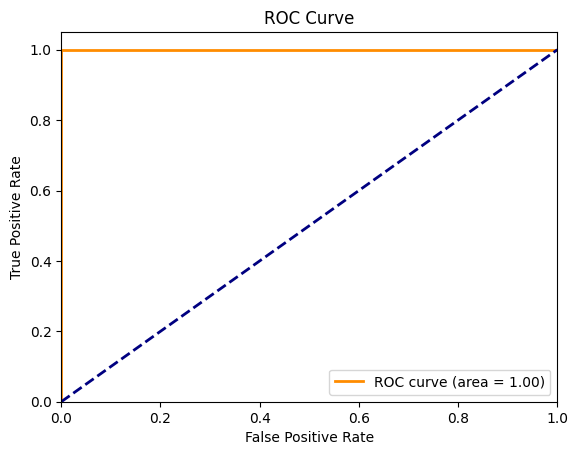

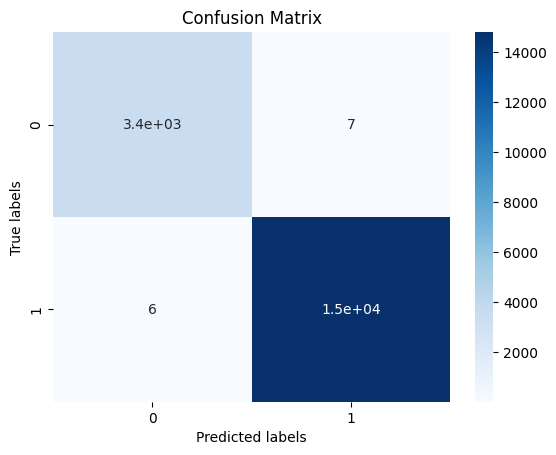

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Plot the ROC curve
y_pred_proba = best_pipeline.predict_proba(X)[:, 1]
fpr, tpr, _ = roc_curve(y, y_pred_proba)
auc_value = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_value)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Plot the confusion matrix
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [46]:
classifier_pipeline2.fit(X,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['votes',
                                                   'approx_cost(for two '
                                                   'people)',
                                                   'online_order_encoded',
                                                   'book_table_encoded']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['location', 'rest_type',
                                                   'dish_liked', 'cuisines',
                                                   'reviews_list', 'menu_item',
                                                   'listed_in(type)',
                                                   'listed_in(city)'])])),
                ('model', RandomForestClassifier())])

In [47]:
param_grid2 = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],  # only valid for numeric columns
    'preprocessor__cat__imputer__strategy': ['most_frequent'],  # valid for categorical columns
    'model__n_estimators': [10, 50, 100],  # hyperparameter for Random Forest Classifier
    'model__max_depth': [None, 5, 10]  # hyperparameter for Random Forest Classifier
}

# Perform GridSearchCV
grid_search2 = GridSearchCV(classifier_pipeline2, param_grid2, cv=5, scoring='accuracy')

# Fit the grid search
grid_search2.fit(X, y)

# Output the best parameters and score
print("Best Parameters:", grid_search2.best_params_)
print("Best Score:", grid_search2.best_score_)

Best Parameters: {'model__max_depth': None, 'model__n_estimators': 50, 'preprocessor__cat__imputer__strategy': 'most_frequent', 'preprocessor__num__imputer__strategy': 'mean'}
Best Score: 0.8907097835023293


In [48]:
scores2 = cross_val_score(grid_search2.best_estimator_, X, y, cv=5, scoring='accuracy')
print("Accuracy:", scores2.mean())

Accuracy: 0.8868183063853111


In [49]:
best_pipeline2 = grid_search2.best_estimator_
best_pipeline2.fit(X, y)

# Predict on the training data (or a separate test set)
y_pred2 = best_pipeline2.predict(X)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y, y_pred2))
print("Classification Report:\n", classification_report(y, y_pred2))
print("Confusion Matrix:\n", confusion_matrix(y, y_pred2))

# Save the best model for future use
joblib.dump(best_pipeline2, 'best_pipeline_model2.pkl')

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3429
           1       1.00      1.00      1.00     14816

    accuracy                           1.00     18245
   macro avg       1.00      1.00      1.00     18245
weighted avg       1.00      1.00      1.00     18245

Confusion Matrix:
 [[ 3429     0]
 [    0 14816]]


['best_pipeline_model2.pkl']

In [58]:
model_KNN5.fit(X,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['votes',
                                                   'approx_cost(for two '
                                                   'people)',
                                                   'online_order_encoded',
                                                   'book_table_encoded']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['location', 'rest_type',
                                                   'dish_liked', 'cuisines',
                                                   'reviews_list', 'menu_item',
                                                   'listed_in(type)',
                                                   'listed_in(city)'])])),
                ('model', KNeighborsClassifier())])

In [61]:
param_grid_knn = {
    'model__n_neighbors': [3, 5, 7, 9, 11],  # number of nearest neighbors
    'model__weights': ['uniform', 'distance'],  # weight function
}

# Perform GridSearchCV
grid_search_knn = GridSearchCV(model_KNN5, param_grid_knn, cv=5, scoring='accuracy')

# Fit the grid search
grid_search_knn.fit(X, y)

# Output the best parameters and score
print("Best Parameters:", grid_search_knn.best_params_)
print("Best Score:", grid_search_knn.best_score_)

# Evaluate the best model using cross-validation
scores_knn = cross_val_score(grid_search_knn.best_estimator_, X, y, cv=5, scoring='accuracy')
print("Accuracy:", scores_knn.mean())

# Fit the best model to the entire dataset
best_knn_pipeline = grid_search_knn.best_estimator_
best_knn_pipeline.fit(X, y)

# Predict on the training data (or a separate test set)
y_pred_knn = best_knn_pipeline.predict(X)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y, y_pred_knn))
print("Classification Report:\n", classification_report(y, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y, y_pred_knn))

# Save the best model for future use
joblib.dump(best_knn_pipeline, 'best_knn_model.pkl')



Best Parameters: {'model__n_neighbors': 3, 'model__weights': 'distance'}
Best Score: 0.9414634146341463
Accuracy: 0.9414634146341463
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3429
           1       1.00      1.00      1.00     14816

    accuracy                           1.00     18245
   macro avg       1.00      1.00      1.00     18245
weighted avg       1.00      1.00      1.00     18245

Confusion Matrix:
 [[ 3429     0]
 [    0 14816]]


['best_knn_model.pkl']

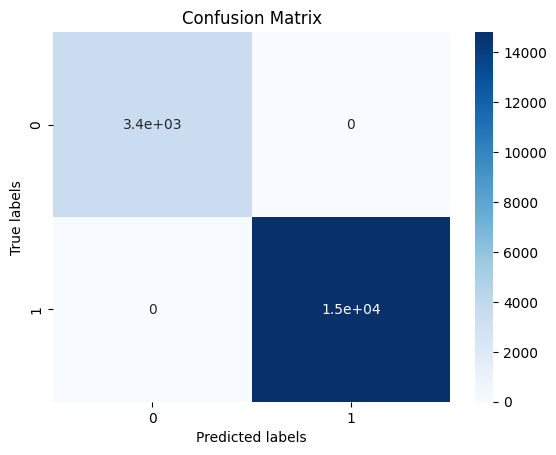

In [67]:
sns.heatmap(confusion_matrix(y, y_pred_knn), annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

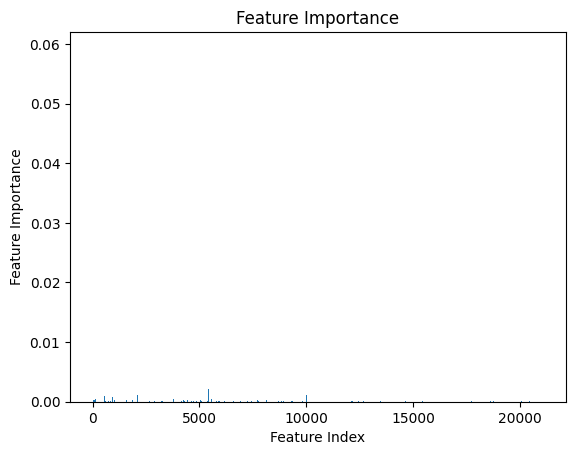

In [74]:
import matplotlib.pyplot as plt

feature_importances = best_pipeline2.steps[1][1].feature_importances_
plt.bar(range(len(feature_importances)), feature_importances)
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.title('Feature Importance')
plt.show()

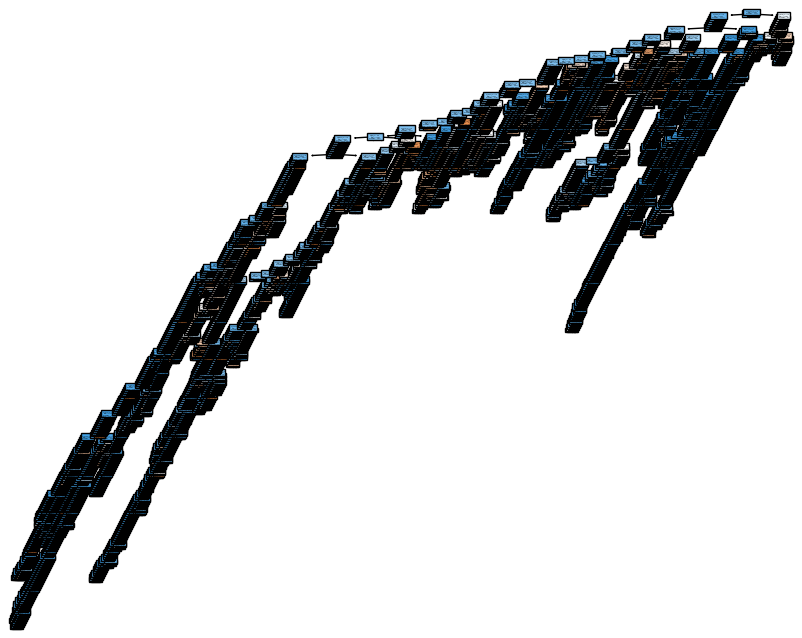

In [75]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 8))
plot_tree(best_pipeline2.steps[1][1].estimators_[0], filled=True)
plt.show()

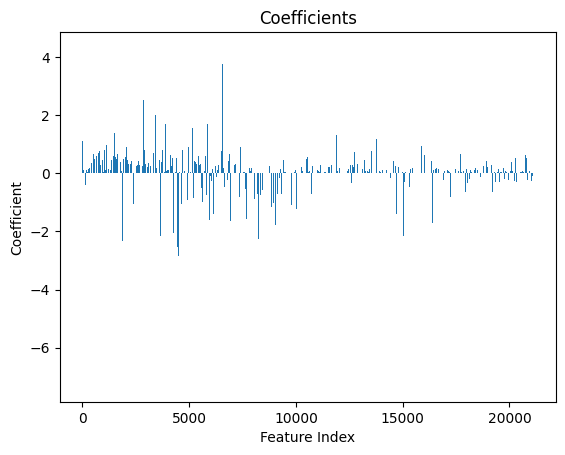

In [78]:
import matplotlib.pyplot as plt

coefficients = best_pipeline.steps[1][1].coef_[0]
plt.bar(range(len(coefficients)), coefficients)
plt.xlabel('Feature Index')
plt.ylabel('Coefficient')
plt.title('Coefficients')
plt.show()

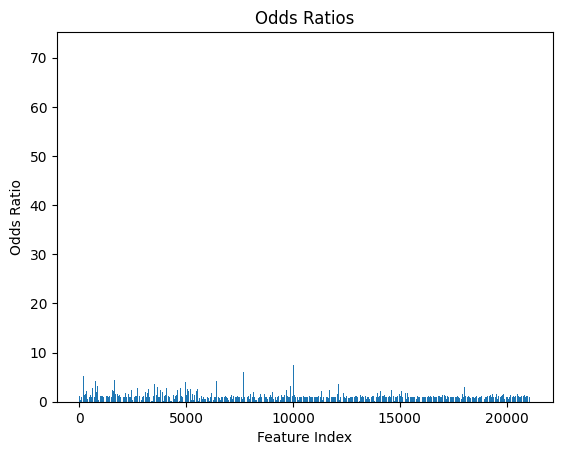

In [79]:
import matplotlib.pyplot as plt

odds_ratios = np.exp(coefficients)
plt.bar(range(len(odds_ratios)), odds_ratios)
plt.xlabel('Feature Index')
plt.ylabel('Odds Ratio')
plt.title('Odds Ratios')
plt.show()

In [81]:
!pip install streamlit
import streamlit as st

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 31.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 68.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 3.9 MB/s eta 0:00:00
